# Phising dataset detection

## import  libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.svm import NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier,AdaBoostClassifier,GradientBoostingClassifier


warnings.simplefilter('ignore')

## load dataset 

In [2]:
training_data = pd.read_csv(r"C:\Users\ishan\Downloads\Complete Dataset\Phising_Training_Dataset\Phising_Training_Dataset.csv") 
test_data     = pd.read_csv(r"C:\Users\ishan\Downloads\Complete Dataset\Phising_Testing_Dataset\Phising_Testing_Dataset.csv")

## head of the data 

In [3]:
training_data.head()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,12344,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,12345,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,12346,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,12347,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,12348,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


## information about dataset 

In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8955 entries, 0 to 8954
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   key                          8955 non-null   int64
 1   having_IP                    8955 non-null   int64
 2   URL_Length                   8955 non-null   int64
 3   Shortining_Service           8955 non-null   int64
 4   having_At_Symbol             8955 non-null   int64
 5   double_slash_redirecting     8955 non-null   int64
 6   Prefix_Suffix                8955 non-null   int64
 7   having_Sub_Domain            8955 non-null   int64
 8   SSLfinal_State               8955 non-null   int64
 9   Domain_registeration_length  8955 non-null   int64
 10  Favicon                      8955 non-null   int64
 11  port                         8955 non-null   int64
 12  HTTPS_token                  8955 non-null   int64
 13  Request_URL                  8955 non-null   int

In [5]:
training_data.describe()

,key,having_IP,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.00000,...,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000,8955.000000
mean,16821.000000,0.307203,-0.635734,0.740480,0.709436,0.740704,-0.735343,0.071803,0.264545,-0.33646,...,0.606700,0.829816,0.028922,0.371078,0.291792,-0.479397,0.712339,0.338582,0.728867,0.124288
std,2585.230164,0.951697,0.763660,0.672116,0.704809,0.671870,0.677733,0.817419,0.908003,0.94175,...,0.794975,0.558069,0.999637,0.928654,0.825557,0.877647,0.701874,0.576068,0.684694,0.992302
min,12344.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,14582.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.00000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,16821.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,19059.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,21298.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## check null values in the dataset 

In [6]:
training_data.isnull().sum()

key                            0
having_IP                      0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

# Mutual Information
#### As i dont have the domain knowledge i just check which columns are highly related with the result columns.For this I used sklearn's mutual_info_regressionn library

In [7]:
def score(model,x,y,cv):
    return cross_val_score(model,x,y,cv=cv,scoring='accuracy').mean()
def getMI(x,y):
    mi_scores=mutual_info_regression(x,y,random_state=0)
    mi_scores=pd.Series(mi_scores,index=x.columns)
    mi_scores=mi_scores.sort_values(ascending=True)
    return mi_scores

In [8]:
y = training_data.Result

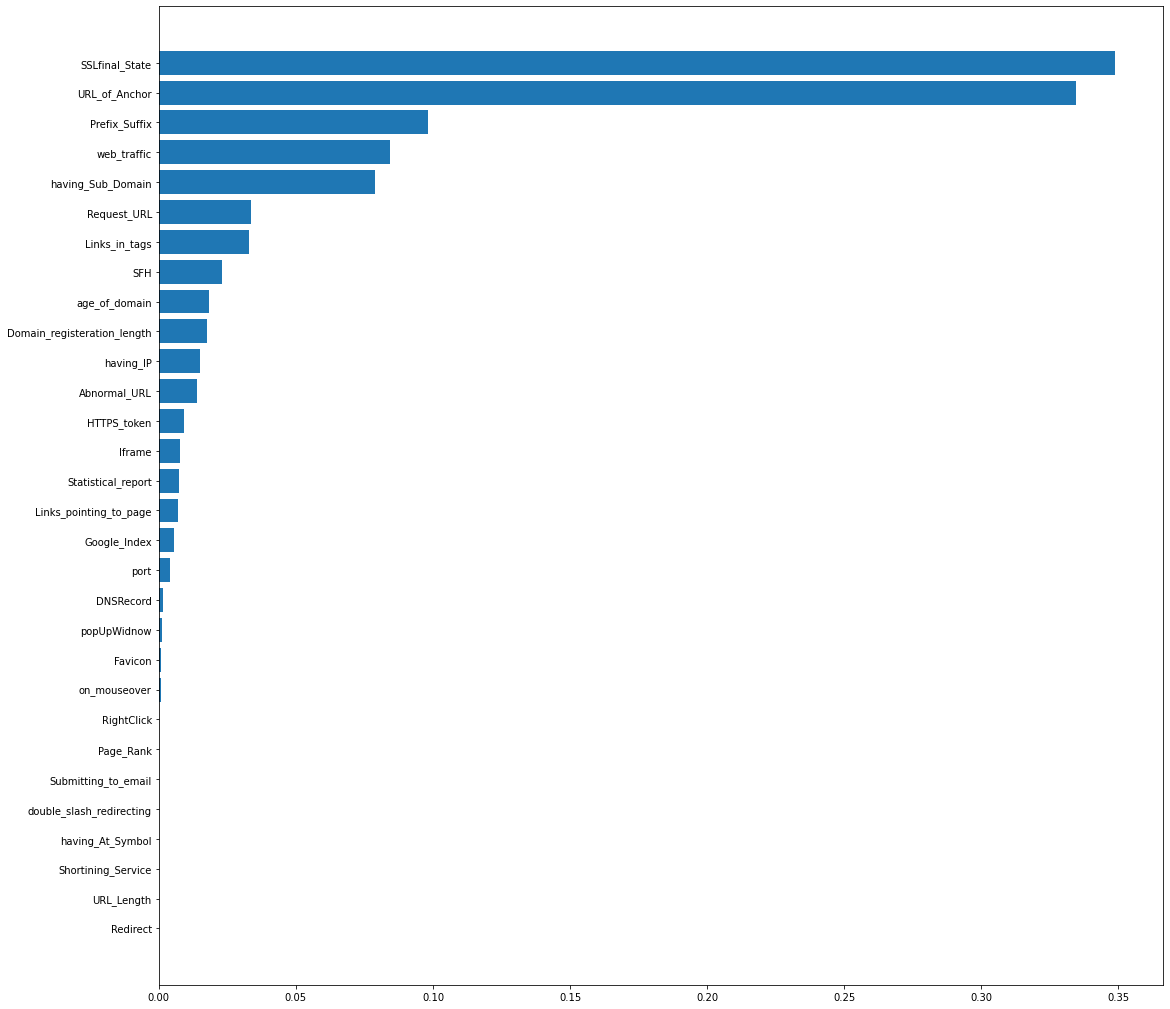

In [9]:
mi_scores=getMI(training_data.drop(columns=['key','Result']),y)
plt.figure(figsize=(18,18))
plt.barh(mi_scores.index,mi_scores.values)
plt.show()

### Based on the plot we know that the columns at the end have nearly no impact on the predictor or target variable.so I decided to remove them

In [10]:
def remove_columns(dataset):
    try:
        dataset = dataset.drop(['key','Result','Redirect', 'URL_Length', 'Shortining_Service', 'having_At_Symbol',
       'double_slash_redirecting', 'Submitting_to_email', 'Page_Rank',
       'RightClick'],axis=1)
    except:
        dataset = dataset.drop(['key','Redirect', 'URL_Length', 'Shortining_Service', 'having_At_Symbol',
       'double_slash_redirecting', 'Submitting_to_email', 'Page_Rank',
       'RightClick'],axis=1)
    return dataset

In [11]:
#X = remove_columns(training_data)
X = training_data.drop("Result",axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Stacking:

### It is a one of  technique of ensemble learning that combines mutliple machine learning algorithms to produce one optimal predective model with reduced variance. 


### Level 0: it contains wide range of diverse algorithms or same algorithm.
### Level1: this model is prepared via K fold  cross validation of base models and out of fold predictions are used as training set.



In [12]:
def get_stacking():
    level0 = [('lr_classifier',LogisticRegression()),
             ('dt_classifier',DecisionTreeClassifier()),
             ('svm_classifier',SVC()),
             ('nusvm_classifier',NuSVC()),
             ('rf_classifier',RandomForestClassifier()),
             ('ada_classifier',AdaBoostClassifier()),
             ('gb_classifier',GradientBoostingClassifier())]
    level1 = RandomForestClassifier()
    model  = StackingClassifier(estimators=level0,final_estimator=level1,cv=10)
    return model

In [13]:
lr_classifier    = LogisticRegression()
dt_classifier    = DecisionTreeClassifier()
svm_classifier   = SVC(C = 50, degree = 1, gamma = "auto", kernel = "rbf", probability = True)
nusvm_classifier = NuSVC(degree = 1, kernel = "rbf", nu = 0.25, probability = True)
rf_classifier    = RandomForestClassifier() 
ada_classifier   = AdaBoostClassifier()
gb_classifier    = GradientBoostingClassifier() 

In [14]:
stacking_classifier = get_stacking()

In [15]:
classifiers = [lr_classifier,dt_classifier,svm_classifier,nusvm_classifier,rf_classifier,ada_classifier,gb_classifier]

In [16]:
for clf in classifiers:
    cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=0)
    clf_scores = cross_val_score(clf,X_train,y_train,scoring='accuracy')
    print(clf.__class__.__name__,"::::Mean",clf_scores.mean(),"std-dev",clf_scores.std())

LogisticRegression ::::Mean 0.9036494300806227 std-dev 0.012499700020568825
DecisionTreeClassifier ::::Mean 0.9316548512649432 std-dev 0.004320965926109704
SVC ::::Mean 0.6691114817903809 std-dev 0.0038021869926039946
NuSVC ::::Mean 0.5044185432304699 std-dev 0.023620214845484207
RandomForestClassifier ::::Mean 0.9619945788156796 std-dev 0.0038146553763801195
AdaBoostClassifier ::::Mean 0.9326572143452877 std-dev 0.005931913414039045
GradientBoostingClassifier ::::Mean 0.9458255490686683 std-dev 0.004932334422317164


In [17]:
stacking_classifier.fit(X_train,y_train)

StackingClassifier(cv=10,
                   estimators=[('lr_classifier', LogisticRegression()),
                               ('dt_classifier', DecisionTreeClassifier()),
                               ('svm_classifier', SVC()),
                               ('nusvm_classifier', NuSVC()),
                               ('rf_classifier', RandomForestClassifier()),
                               ('ada_classifier', AdaBoostClassifier()),
                               ('gb_classifier', GradientBoostingClassifier())],
                   final_estimator=RandomForestClassifier())

In [18]:
predictions = stacking_classifier.predict(X_test)

In [19]:
#metric
from sklearn.metrics import accuracy_score,confusion_matrix

In [20]:
print(accuracy_score(y_test,predictions))

0.9627875507442489


In [21]:
test_data1 = remove_columns(test_data)    

In [22]:
predictions = stacking_classifier.predict(test_data)

In [23]:
output_df = pd.DataFrame(data = test_data['key'],columns=['key'])

In [24]:
output_df['Result'] = predictions

In [25]:
output_df.to_csv("submission3.csv",index=False)